<a href="https://colab.research.google.com/github/premkumar6/Email-Spam-Classification/blob/main/classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, num_hidden):
    super(Model,self).__init__()
    self.layer1 = nn.Linear(28*28,num_hidden)
    self.layer2 = nn.Linear(num_hidden,1)
    self.num_hidden = num_hidden

  def forward(self,img):
    flattened = img.view(-1,28*28)
    activation1 = self.layer1(flattened)
    activation1 = F.relu(activation1)
    activation2= self.layer2(activation1)

model = Model(30)


In [3]:
class Model(nn.Module):
  def __init__(self,num_hidden):
    super(Model,self).__init__()
    self.layer1 = nn.Linear(28*28,100)
    self.layer2 = nn.Linear(100,50)
    self.layer3 = nn.Linear(50,20)
    self.layer4 = nn.Linear(20,1)
    self.num_hidden = num_hidden
  
  def forward(self,img):
    flattened = img.view(-1,28*28)
    activation1 = F.relu(self.layer1(flattened))
    activation2 = F.relu(self.layer2(activation1))
    activation3 = F.relu(self.layer3(activation2))
    output = self.layer4(activation3)
    return output

In [5]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [6]:
mnist_images = datasets.MNIST(root='/data', download=True , train=True)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw




Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw




Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


ValueError: ignored

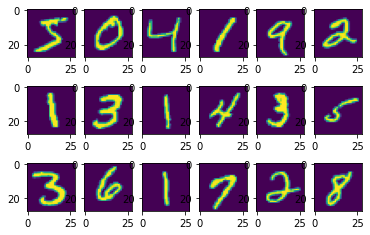

In [9]:
for k, (image,label) in enumerate(mnist_images):
  if k>18:
    break
  plt.subplot(3,6,k+1)
  plt.imshow(image)

In [10]:
mnist_data = datasets.MNIST(root='/data', download = True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)

mnist_train = mnist_data[:4096]
mnist_validate = mnist_data[4096:5120]

In [17]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier, self).__init__()
    self.layer1 = nn.Linear(28*28,50)
    self.layer2 = nn.Linear(50,20)
    self.layer3 = nn.Linear(20,10)
  def forward(self,img):
    flattened = img.view(-1,28*28)
    activation1 = F.relu(self.layer1(flattened))
    activation2 = F.relu(self.layer2(activation1))
    output = self.layer3(activation2)
    return output

model= MNISTClassifier()


In [18]:
img,label = mnist_train[0]
preds = model(img)
print(preds)
print(preds.shape)

tensor([[-0.1966, -0.0679, -0.0153, -0.0226,  0.1807, -0.1309,  0.0253, -0.0470,
         -0.1081,  0.0792]], grad_fn=<AddmmBackward>)
torch.Size([1, 10])


In [27]:
prob = torch.max(F.softmax(preds,dim=1))
prob

tensor(0.1228, grad_fn=<MaxBackward1>)

LOSS

In [30]:
import torch.optim as optim

def train(model, data, batch_size=64, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [38]:
train_acc_loader = torch.utils.data.DataLoader(mnist_train, batch_size=4096)
val_acc_loader = torch.utils.data.DataLoader(mnist_validate, batch_size=1024)

def get_accuracy(model, train=False):
  if train:
    model = mnist_train
  else:
    model = mnist_validate

  correct = 0
  total = 0 
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
    output = model(imgs) # We don't need to run F.softmax
    pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
    return correct / total